In [1]:
import snap
import numpy as np
import pandas as pd
import sys
import os
import argparse
import matplotlib.pyplot as plt
import random as random
import operator

In [5]:
def ER_degree_distribution(N, E):

    Graph = snap.TNEANet.New()
    for index in range(1,N+1): Graph.AddNode(index)
    while(Graph.GetEdges() < E):
        SrcNId = random.randint(1,N)
        DstNId = random.randint(1, N)
        if Graph.IsEdge(SrcNId, DstNId) is False:
            Graph.AddEdge(SrcNId, DstNId)
    NodeItr = Graph.BegNI()
    distribution = {}
    for node in range(0, Graph.GetNodes()):
        nodeId = NodeItr.GetId()
        nodeDeg = NodeItr.GetDeg()
        if nodeDeg in distribution: distribution[nodeDeg] += 1
        else: distribution[nodeDeg] = 1
        NodeItr.Next()
        
    X, Y= [], []
    for key in distribution:
        X.append(key)
        Y.append(distribution[key])
        
    return X,Y

In [6]:
def calculate_degree_distribution(graph_name, G, node_name):
    NodeItr = G.BegNI()
    distribution = {}
    for node in range(0, G.GetNodes()):
        nodeId = NodeItr.GetId()
        nodeDeg = NodeItr.GetDeg()
        if nodeDeg in distribution: distribution[nodeDeg] += 1
        else: distribution[nodeDeg] = 1
        NodeItr.Next()

    X, Y = [], []
    for key in distribution:
        X.append(key)
        Y.append(distribution[key])
   # X_ER, Y_ER = ER_degree_distribution(G.GetNodes(), G.GetEdges())
    
    plt.scatter(X, Y, s = 5, color = 'g', label =  node_name + ' Distribution', alpha = 1)
    #plt.scatter(X_ER, Y_ER, s = 5, color = 'black', label = 'Erdos-Renyi Distribution', alpha = 1)                                   
    plt.xscale('log')
    plt.yscale('log')
   # plt.title("Degree Distribution for " + graph_name)
    plt.xlabel("Degree (Log Scale)")
    plt.ylabel("Number of Nodes (Log Scale)")
    plt.legend()
    plt.savefig(graph_name + " Distribution.pdf")
    plt.show()

In [7]:
def calculate_degree_distributions(G, set1, set2, set1_name, set2_name, graph_name):
    NodeItr = G.BegNI()
    set1_distribution, set2_distribution = {}, {}
    for node in range(0, G.GetNodes()):
        nodeId = NodeItr.GetId()
        nodeDeg = NodeItr.GetDeg()
        if nodeId in set1:
            if nodeDeg in set1_distribution: set1_distribution[nodeDeg] += 1
            else: set1_distribution[nodeDeg] = 1
        else:
            if nodeDeg in set2_distribution: set2_distribution[nodeDeg] += 1
            else: set2_distribution[nodeDeg] = 1
        NodeItr.Next()

    X_set1, Y_set1, X_set2, Y_set2 = [], [], [], []
    for key in set1_distribution:
        X_set1.append(key)
        Y_set1.append(set1_distribution[key])
    for key in set2_distribution:
        X_set2.append(key)
        Y_set2.append(set2_distribution[key])
    
   # X_ER, Y_ER = ER_degree_distribution(G.GetNodes(), G.GetEdges())
    
    plt.scatter(X_set1, Y_set1, s = 5, color = 'r', label = set1_name + ' Distribution', alpha = 1)
    plt.scatter(X_set2, Y_set2, s = 5, color = 'b', label = set2_name +' Distribution', alpha = 1)
    #plt.scatter(X_ER, Y_ER, s = 5, color = 'black', label = 'Erdos-Renyi Distribution', alpha = 1)                                   
    plt.xscale('log')
    plt.yscale('log')
   # plt.title("Degree Distribution for " + graph_name)
    plt.xlabel("Degree (Log Scale)")
    plt.ylabel("Number of Nodes (Log Scale)")
    plt.legend()
    plt.savefig(graph_name + " Distribution.pdf")
    plt.show()

Number of company nodes in the network:  11572
Number of investor nodes in the network:  10465
Number of company-investor nodes:  92
Number of total nodes in the network:  21945
Number of Edges in the network:  52868
Graph Density:  0.000109784619637
Cluster Coefficient:  0.000364636214497


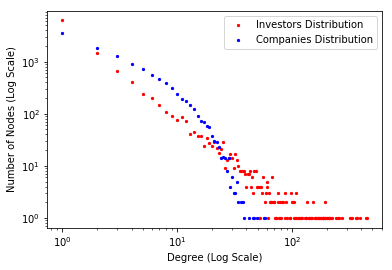

In [8]:
FIn = snap.TFIn('../graphs/investments-to-companies_TNEANet/investments-to-companies.graph')
investors = np.load('../graphs/investments-to-companies_TNEANet/bipartite_source_class.npy')
companies = np.load('../graphs/investments-to-companies_TNEANet/bipartite_dest_class.npy')

InvestToComp = snap.TNEANet.Load(FIn)
nodeCount = InvestToComp.GetNodes()
edgeCount = InvestToComp.GetEdges()
print "Number of company nodes in the network: ", len(companies)
print "Number of investor nodes in the network: ", len(investors)
print "Number of company-investor nodes: ", abs(nodeCount - len(companies) - len(investors))
print "Number of total nodes in the network: ", nodeCount
print "Number of Edges in the network: ", edgeCount
print "Graph Density: ", (1.0*edgeCount)/(nodeCount*(nodeCount-1))
print "Cluster Coefficient: ", snap.GetClustCf(InvestToComp)
calculate_degree_distributions(InvestToComp, investors, companies, "Investors", "Companies", "Investors-to-Companies")

Number of company nodes in the network:  4563
Number of acquirer nodes in the network:  2641
Number of company-acquirer nodes:  278
Number of total nodes in the network:  6926
Number of Edges in the network:  4651
Graph Density:  9.69714912989e-05
Cluster Coefficient:  0.000125132351526


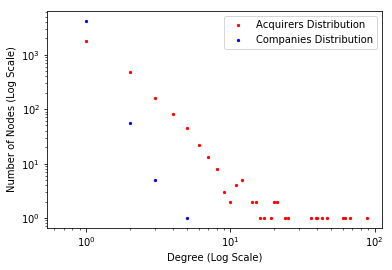

In [9]:
FIn = snap.TFIn('../graphs/companies-to-acqui_TNEANet/companies-to-acqui.graph')
companies = np.load('../graphs/companies-to-acqui_TNEANet/bipartite_source_class.npy')
acquirers = np.load('../graphs/companies-to-acqui_TNEANet/bipartite_dest_class.npy')

CompToAqui = snap.TNEANet.Load(FIn)
nodeCount = CompToAqui.GetNodes()
edgeCount = CompToAqui.GetEdges()
print "Number of company nodes in the network: ", len(companies)
print "Number of acquirer nodes in the network: ", len(acquirers)
print "Number of company-acquirer nodes: ", abs(nodeCount - len(companies) - len(acquirers))
print "Number of total nodes in the network: ", nodeCount
print "Number of Edges in the network: ", edgeCount
print "Graph Density: ", (1.0*edgeCount)/(nodeCount*(nodeCount-1))
print "Cluster Coefficient: ", snap.GetClustCf(CompToAqui)
calculate_degree_distributions(CompToAqui, acquirers, companies, "Acquirers", "Companies", "Companies-to-Acquirers")

Number of total nodes in the network:  11572
Number of Edges in the network:  398154
Graph Density:  0.0059470523335
Cluster Coefficient:  0.573753609951


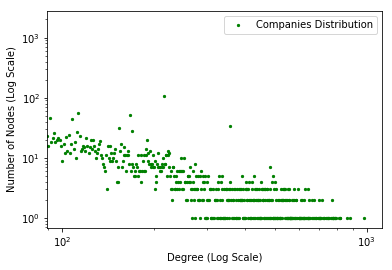

In [10]:
FIn = snap.TFIn('../graphs/investments-to-companies_TNEANet/investments-to-companies_TNEANet_folded_reverse_order.graph')
InvestedComp = snap.TUNGraph.Load(FIn)
nodeCount = InvestedComp.GetNodes()
edgeCount = InvestedComp.GetEdges()
print "Number of total nodes in the network: ", nodeCount
print "Number of Edges in the network: ", edgeCount
print "Graph Density: ", (2.0*edgeCount)/(nodeCount*(nodeCount-1))
print "Cluster Coefficient: ", snap.GetClustCf(InvestedComp)
calculate_degree_distribution("Invested-Companies", InvestedComp, 'Companies')

Number of total nodes in the network:  4563
Number of Edges in the network:  16184
Graph Density:  0.00155492739717
Cluster Coefficient:  0.380808123898


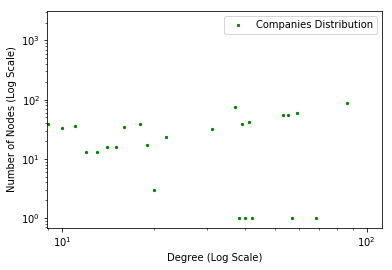

In [11]:
FIn = snap.TFIn('../graphs/companies-to-acqui_TNEANet/companies-to-acqui_TNEANet_folded.graph')
AquiComp = snap.TUNGraph.Load(FIn)
nodeCount = AquiComp.GetNodes()
edgeCount = AquiComp.GetEdges()
print "Number of total nodes in the network: ", nodeCount
print "Number of Edges in the network: ", edgeCount
print "Graph Density: ", (2.0*edgeCount)/(nodeCount*(nodeCount-1))
print "Cluster Coefficient: ", snap.GetClustCf(AquiComp)
calculate_degree_distribution("Acquired-Companies", AquiComp, 'Companies')

In [14]:
investors = np.load('../graphs/investments-to-companies_TNEANet/bipartite_source_class.npy')
InCompanies = np.load('../graphs/investments-to-companies_TNEANet/bipartite_dest_class.npy')
acquirers = np.load('../graphs/companies-to-acqui_TNEANet/bipartite_dest_class.npy')
AcCompanies = np.load('../graphs/companies-to-acqui_TNEANet/bipartite_source_class.npy')
InNodeVals = np.load('../graphs/investments-to-companies_TNEANet/node_id_to_value.npy')
AcNodeVals = np.load('../graphs/companies-to-acqui_TNEANet/node_id_to_value.npy')

NodeItr = InvestToComp.BegNI()

neighbor_sets = {}
for node in range(0, InvestToComp.GetNodes()):
    nodeId = NodeItr.GetId()
    nodeDeg = NodeItr.GetDeg()
    if nodeId in InCompanies:
        neighbors = set()
        for neighbor in range(0, nodeDeg):
            neighbors.add(NodeItr.GetNbrNId(neighbor))
        neighbor_sets[nodeId] = neighbors
    NodeItr.Next()

JA_score_lists = {}
print "Running"
counter = 0
for node in neighbor_sets:
    counter += 1
    JA_scores = {}
    node_neighbors = neighbor_sets[node]
    for neighbor in neighbor_sets:
        
        if node != neighbor:
            
            intersection = len(node_neighbors.intersection(neighbor_sets[neighbor]))  
            JA_scores[neighbor] = float(intersection) / len(node_neighbors.union(neighbor_sets[neighbor])) 

    JA_score_lists[node] = JA_scores

Running
1 11572
2 11572
3 11572
4 11572
5 11572
6 11572
7 11572
8 11572
9 11572
10 11572
11 11572
12 11572
13 11572
14 11572
15 11572
16 11572
17 11572
18 11572
19 11572
20 11572
21 11572
22 11572
23 11572
24 11572
25 11572
26 11572
27 11572
28 11572
29 11572
30 11572
31 11572
32 11572
33 11572
34 11572
35 11572
36 11572
37 11572
38 11572
39 11572
40 11572
41 11572
42 11572
43 11572
44 11572
45 11572
46 11572
47 11572
48 11572
49 11572
50 11572
51 11572
52 11572
53 11572
54 11572
55 11572
56 11572
57 11572
58 11572
59 11572
60 11572
61 11572
62 11572
63 11572
64 11572
65 11572
66 11572
67 11572
68 11572
69 11572
70 11572
71 11572
72 11572
73 11572
74 11572
75 11572
76 11572
77 11572
78 11572
79 11572
80 11572
81 11572
82 11572
83 11572
84 11572
85 11572
86 11572
87 11572
88 11572
89 11572
90 11572
91 11572
92 11572
93 11572
94 11572
95 11572
96 11572
97 11572
98 11572
99 11572
100 11572
101 11572
102 11572
103 11572
104 11572
105 11572
106 11572
107 11572
108 11572
109 11572
110 11572


832 11572
833 11572
834 11572
835 11572
836 11572
837 11572
838 11572
839 11572
840 11572
841 11572
842 11572
843 11572
844 11572
845 11572
846 11572
847 11572
848 11572
849 11572
850 11572
851 11572
852 11572
853 11572
854 11572
855 11572
856 11572
857 11572
858 11572
859 11572
860 11572
861 11572
862 11572
863 11572
864 11572
865 11572
866 11572
867 11572
868 11572
869 11572
870 11572
871 11572
872 11572
873 11572
874 11572
875 11572
876 11572
877 11572
878 11572
879 11572
880 11572
881 11572
882 11572
883 11572
884 11572
885 11572
886 11572
887 11572
888 11572
889 11572
890 11572
891 11572
892 11572
893 11572
894 11572
895 11572
896 11572
897 11572
898 11572
899 11572
900 11572
901 11572
902 11572
903 11572
904 11572
905 11572
906 11572
907 11572
908 11572
909 11572
910 11572
911 11572
912 11572
913 11572
914 11572
915 11572
916 11572
917 11572
918 11572
919 11572
920 11572
921 11572
922 11572
923 11572
924 11572
925 11572
926 11572
927 11572
928 11572
929 11572
930 11572
931 11572


1598 11572
1599 11572
1600 11572
1601 11572
1602 11572
1603 11572
1604 11572
1605 11572
1606 11572
1607 11572
1608 11572
1609 11572
1610 11572
1611 11572
1612 11572
1613 11572
1614 11572
1615 11572
1616 11572
1617 11572
1618 11572
1619 11572
1620 11572
1621 11572
1622 11572
1623 11572
1624 11572
1625 11572
1626 11572
1627 11572
1628 11572
1629 11572
1630 11572
1631 11572
1632 11572
1633 11572
1634 11572
1635 11572
1636 11572
1637 11572
1638 11572
1639 11572
1640 11572
1641 11572
1642 11572
1643 11572
1644 11572
1645 11572
1646 11572
1647 11572
1648 11572
1649 11572
1650 11572
1651 11572
1652 11572
1653 11572
1654 11572
1655 11572
1656 11572
1657 11572
1658 11572
1659 11572
1660 11572
1661 11572
1662 11572
1663 11572
1664 11572
1665 11572
1666 11572
1667 11572
1668 11572
1669 11572
1670 11572
1671 11572
1672 11572
1673 11572
1674 11572
1675 11572
1676 11572
1677 11572
1678 11572
1679 11572
1680 11572
1681 11572
1682 11572
1683 11572
1684 11572
1685 11572
1686 11572
1687 11572
1688 11572

2343 11572
2344 11572
2345 11572
2346 11572
2347 11572
2348 11572
2349 11572
2350 11572
2351 11572
2352 11572
2353 11572
2354 11572
2355 11572
2356 11572
2357 11572
2358 11572
2359 11572
2360 11572
2361 11572
2362 11572
2363 11572
2364 11572
2365 11572
2366 11572
2367 11572
2368 11572
2369 11572
2370 11572
2371 11572
2372 11572
2373 11572
2374 11572
2375 11572
2376 11572
2377 11572
2378 11572
2379 11572
2380 11572
2381 11572
2382 11572
2383 11572
2384 11572
2385 11572
2386 11572
2387 11572
2388 11572
2389 11572
2390 11572
2391 11572
2392 11572
2393 11572
2394 11572
2395 11572
2396 11572
2397 11572
2398 11572
2399 11572
2400 11572
2401 11572
2402 11572
2403 11572
2404 11572
2405 11572
2406 11572
2407 11572
2408 11572
2409 11572
2410 11572
2411 11572
2412 11572
2413 11572
2414 11572
2415 11572
2416 11572
2417 11572
2418 11572
2419 11572
2420 11572
2421 11572
2422 11572
2423 11572
2424 11572
2425 11572
2426 11572
2427 11572
2428 11572
2429 11572
2430 11572
2431 11572
2432 11572
2433 11572

3089 11572
3090 11572
3091 11572
3092 11572
3093 11572
3094 11572
3095 11572
3096 11572
3097 11572
3098 11572
3099 11572
3100 11572
3101 11572
3102 11572
3103 11572
3104 11572
3105 11572
3106 11572
3107 11572
3108 11572
3109 11572
3110 11572
3111 11572
3112 11572
3113 11572
3114 11572
3115 11572
3116 11572
3117 11572
3118 11572
3119 11572
3120 11572
3121 11572
3122 11572
3123 11572
3124 11572
3125 11572
3126 11572
3127 11572
3128 11572
3129 11572
3130 11572
3131 11572
3132 11572
3133 11572
3134 11572
3135 11572
3136 11572
3137 11572
3138 11572
3139 11572
3140 11572
3141 11572
3142 11572
3143 11572
3144 11572
3145 11572
3146 11572
3147 11572
3148 11572
3149 11572
3150 11572
3151 11572
3152 11572
3153 11572
3154 11572
3155 11572
3156 11572
3157 11572
3158 11572
3159 11572
3160 11572
3161 11572
3162 11572
3163 11572
3164 11572
3165 11572
3166 11572
3167 11572
3168 11572
3169 11572
3170 11572
3171 11572
3172 11572
3173 11572
3174 11572
3175 11572
3176 11572
3177 11572
3178 11572
3179 11572

3835 11572
3836 11572
3837 11572
3838 11572
3839 11572
3840 11572
3841 11572
3842 11572
3843 11572
3844 11572
3845 11572
3846 11572
3847 11572
3848 11572
3849 11572
3850 11572
3851 11572
3852 11572
3853 11572
3854 11572
3855 11572
3856 11572
3857 11572
3858 11572
3859 11572
3860 11572
3861 11572
3862 11572
3863 11572
3864 11572
3865 11572
3866 11572
3867 11572
3868 11572
3869 11572
3870 11572
3871 11572
3872 11572
3873 11572
3874 11572
3875 11572
3876 11572
3877 11572
3878 11572
3879 11572
3880 11572
3881 11572
3882 11572
3883 11572
3884 11572
3885 11572
3886 11572
3887 11572
3888 11572
3889 11572
3890 11572
3891 11572
3892 11572
3893 11572
3894 11572
3895 11572
3896 11572
3897 11572
3898 11572
3899 11572
3900 11572
3901 11572
3902 11572
3903 11572
3904 11572
3905 11572
3906 11572
3907 11572
3908 11572
3909 11572
3910 11572
3911 11572
3912 11572
3913 11572
3914 11572
3915 11572
3916 11572
3917 11572
3918 11572
3919 11572
3920 11572
3921 11572
3922 11572
3923 11572
3924 11572
3925 11572

4584 11572
4585 11572
4586 11572
4587 11572
4588 11572
4589 11572
4590 11572
4591 11572
4592 11572
4593 11572
4594 11572
4595 11572
4596 11572
4597 11572
4598 11572
4599 11572
4600 11572
4601 11572
4602 11572
4603 11572
4604 11572
4605 11572
4606 11572
4607 11572
4608 11572
4609 11572
4610 11572
4611 11572
4612 11572
4613 11572
4614 11572
4615 11572
4616 11572
4617 11572
4618 11572
4619 11572
4620 11572
4621 11572
4622 11572
4623 11572
4624 11572
4625 11572
4626 11572
4627 11572
4628 11572
4629 11572
4630 11572
4631 11572
4632 11572
4633 11572
4634 11572
4635 11572
4636 11572
4637 11572
4638 11572
4639 11572
4640 11572
4641 11572
4642 11572
4643 11572
4644 11572
4645 11572
4646 11572
4647 11572
4648 11572
4649 11572
4650 11572
4651 11572
4652 11572
4653 11572
4654 11572
4655 11572
4656 11572
4657 11572
4658 11572
4659 11572
4660 11572
4661 11572
4662 11572
4663 11572
4664 11572
4665 11572
4666 11572
4667 11572
4668 11572
4669 11572
4670 11572
4671 11572
4672 11572
4673 11572
4674 11572

5334 11572
5335 11572
5336 11572
5337 11572
5338 11572
5339 11572
5340 11572
5341 11572
5342 11572
5343 11572
5344 11572
5345 11572
5346 11572
5347 11572
5348 11572
5349 11572
5350 11572
5351 11572
5352 11572
5353 11572
5354 11572
5355 11572
5356 11572
5357 11572
5358 11572
5359 11572
5360 11572
5361 11572
5362 11572
5363 11572
5364 11572
5365 11572
5366 11572
5367 11572
5368 11572
5369 11572
5370 11572
5371 11572
5372 11572
5373 11572
5374 11572
5375 11572
5376 11572
5377 11572
5378 11572
5379 11572
5380 11572
5381 11572
5382 11572
5383 11572
5384 11572
5385 11572
5386 11572
5387 11572
5388 11572
5389 11572
5390 11572
5391 11572
5392 11572
5393 11572
5394 11572
5395 11572
5396 11572
5397 11572
5398 11572
5399 11572
5400 11572
5401 11572
5402 11572
5403 11572
5404 11572
5405 11572
5406 11572
5407 11572
5408 11572
5409 11572
5410 11572
5411 11572
5412 11572
5413 11572
5414 11572
5415 11572
5416 11572
5417 11572
5418 11572
5419 11572
5420 11572
5421 11572
5422 11572
5423 11572
5424 11572

6082 11572
6083 11572
6084 11572
6085 11572
6086 11572
6087 11572
6088 11572
6089 11572
6090 11572
6091 11572
6092 11572
6093 11572
6094 11572
6095 11572
6096 11572
6097 11572
6098 11572
6099 11572
6100 11572
6101 11572
6102 11572
6103 11572
6104 11572
6105 11572
6106 11572
6107 11572
6108 11572
6109 11572
6110 11572
6111 11572
6112 11572
6113 11572
6114 11572
6115 11572
6116 11572
6117 11572
6118 11572
6119 11572
6120 11572
6121 11572
6122 11572
6123 11572
6124 11572
6125 11572
6126 11572
6127 11572
6128 11572
6129 11572
6130 11572
6131 11572
6132 11572
6133 11572
6134 11572
6135 11572
6136 11572
6137 11572
6138 11572
6139 11572
6140 11572
6141 11572
6142 11572
6143 11572
6144 11572
6145 11572
6146 11572
6147 11572
6148 11572
6149 11572
6150 11572
6151 11572
6152 11572
6153 11572
6154 11572
6155 11572
6156 11572
6157 11572
6158 11572
6159 11572
6160 11572
6161 11572
6162 11572
6163 11572
6164 11572
6165 11572
6166 11572
6167 11572
6168 11572
6169 11572
6170 11572
6171 11572
6172 11572

6828 11572
6829 11572
6830 11572
6831 11572
6832 11572
6833 11572
6834 11572
6835 11572
6836 11572
6837 11572
6838 11572
6839 11572
6840 11572
6841 11572
6842 11572
6843 11572
6844 11572
6845 11572
6846 11572
6847 11572
6848 11572
6849 11572
6850 11572
6851 11572
6852 11572
6853 11572
6854 11572
6855 11572
6856 11572
6857 11572
6858 11572
6859 11572
6860 11572
6861 11572
6862 11572
6863 11572
6864 11572
6865 11572
6866 11572
6867 11572
6868 11572
6869 11572
6870 11572
6871 11572
6872 11572
6873 11572
6874 11572
6875 11572
6876 11572
6877 11572
6878 11572
6879 11572
6880 11572
6881 11572
6882 11572
6883 11572
6884 11572
6885 11572
6886 11572
6887 11572
6888 11572
6889 11572
6890 11572
6891 11572
6892 11572
6893 11572
6894 11572
6895 11572
6896 11572
6897 11572
6898 11572
6899 11572
6900 11572
6901 11572
6902 11572
6903 11572
6904 11572
6905 11572
6906 11572
6907 11572
6908 11572
6909 11572
6910 11572
6911 11572
6912 11572
6913 11572
6914 11572
6915 11572
6916 11572
6917 11572
6918 11572

7579 11572
7580 11572
7581 11572
7582 11572
7583 11572
7584 11572
7585 11572
7586 11572
7587 11572
7588 11572
7589 11572
7590 11572
7591 11572
7592 11572
7593 11572
7594 11572
7595 11572
7596 11572
7597 11572
7598 11572
7599 11572
7600 11572
7601 11572
7602 11572
7603 11572
7604 11572
7605 11572
7606 11572
7607 11572
7608 11572
7609 11572
7610 11572
7611 11572
7612 11572
7613 11572
7614 11572
7615 11572
7616 11572
7617 11572
7618 11572
7619 11572
7620 11572
7621 11572
7622 11572
7623 11572
7624 11572
7625 11572
7626 11572
7627 11572
7628 11572
7629 11572
7630 11572
7631 11572
7632 11572
7633 11572
7634 11572
7635 11572
7636 11572
7637 11572
7638 11572
7639 11572
7640 11572
7641 11572
7642 11572
7643 11572
7644 11572
7645 11572
7646 11572
7647 11572
7648 11572
7649 11572
7650 11572
7651 11572
7652 11572
7653 11572
7654 11572
7655 11572
7656 11572
7657 11572
7658 11572
7659 11572
7660 11572
7661 11572
7662 11572
7663 11572
7664 11572
7665 11572
7666 11572
7667 11572
7668 11572
7669 11572

8325 11572
8326 11572
8327 11572
8328 11572
8329 11572
8330 11572
8331 11572
8332 11572
8333 11572
8334 11572
8335 11572
8336 11572
8337 11572
8338 11572
8339 11572
8340 11572
8341 11572
8342 11572
8343 11572
8344 11572
8345 11572
8346 11572
8347 11572
8348 11572
8349 11572
8350 11572
8351 11572
8352 11572
8353 11572
8354 11572
8355 11572
8356 11572
8357 11572
8358 11572
8359 11572
8360 11572
8361 11572
8362 11572
8363 11572
8364 11572
8365 11572
8366 11572
8367 11572
8368 11572
8369 11572
8370 11572
8371 11572
8372 11572
8373 11572
8374 11572
8375 11572
8376 11572
8377 11572
8378 11572
8379 11572
8380 11572
8381 11572
8382 11572
8383 11572
8384 11572
8385 11572
8386 11572
8387 11572
8388 11572
8389 11572
8390 11572
8391 11572
8392 11572
8393 11572
8394 11572
8395 11572
8396 11572
8397 11572
8398 11572
8399 11572
8400 11572
8401 11572
8402 11572
8403 11572
8404 11572
8405 11572
8406 11572
8407 11572
8408 11572
8409 11572
8410 11572
8411 11572
8412 11572
8413 11572
8414 11572
8415 11572

9071 11572
9072 11572
9073 11572
9074 11572
9075 11572
9076 11572
9077 11572
9078 11572
9079 11572
9080 11572
9081 11572
9082 11572
9083 11572
9084 11572
9085 11572
9086 11572
9087 11572
9088 11572
9089 11572
9090 11572
9091 11572
9092 11572
9093 11572
9094 11572
9095 11572
9096 11572
9097 11572
9098 11572
9099 11572
9100 11572
9101 11572
9102 11572
9103 11572
9104 11572
9105 11572
9106 11572
9107 11572
9108 11572
9109 11572
9110 11572
9111 11572
9112 11572
9113 11572
9114 11572
9115 11572
9116 11572
9117 11572
9118 11572
9119 11572
9120 11572
9121 11572
9122 11572
9123 11572
9124 11572
9125 11572
9126 11572
9127 11572
9128 11572
9129 11572
9130 11572
9131 11572
9132 11572
9133 11572
9134 11572
9135 11572
9136 11572
9137 11572
9138 11572
9139 11572
9140 11572
9141 11572
9142 11572
9143 11572
9144 11572
9145 11572
9146 11572
9147 11572
9148 11572
9149 11572
9150 11572
9151 11572
9152 11572
9153 11572
9154 11572
9155 11572
9156 11572
9157 11572
9158 11572
9159 11572
9160 11572
9161 11572

9820 11572
9821 11572
9822 11572
9823 11572
9824 11572
9825 11572
9826 11572
9827 11572
9828 11572
9829 11572
9830 11572
9831 11572
9832 11572
9833 11572
9834 11572
9835 11572
9836 11572
9837 11572
9838 11572
9839 11572
9840 11572
9841 11572
9842 11572
9843 11572
9844 11572
9845 11572
9846 11572
9847 11572
9848 11572
9849 11572
9850 11572
9851 11572
9852 11572
9853 11572
9854 11572
9855 11572
9856 11572
9857 11572
9858 11572
9859 11572
9860 11572
9861 11572
9862 11572
9863 11572
9864 11572
9865 11572
9866 11572
9867 11572
9868 11572
9869 11572
9870 11572
9871 11572
9872 11572
9873 11572
9874 11572
9875 11572
9876 11572
9877 11572
9878 11572
9879 11572
9880 11572
9881 11572
9882 11572
9883 11572
9884 11572
9885 11572
9886 11572
9887 11572
9888 11572
9889 11572
9890 11572
9891 11572
9892 11572
9893 11572
9894 11572
9895 11572
9896 11572
9897 11572
9898 11572
9899 11572
9900 11572
9901 11572
9902 11572
9903 11572
9904 11572
9905 11572
9906 11572
9907 11572
9908 11572
9909 11572
9910 11572

10521 11572
10522 11572
10523 11572
10524 11572
10525 11572
10526 11572
10527 11572
10528 11572
10529 11572
10530 11572
10531 11572
10532 11572
10533 11572
10534 11572
10535 11572
10536 11572
10537 11572
10538 11572
10539 11572
10540 11572
10541 11572
10542 11572
10543 11572
10544 11572
10545 11572
10546 11572
10547 11572
10548 11572
10549 11572
10550 11572
10551 11572
10552 11572
10553 11572
10554 11572
10555 11572
10556 11572
10557 11572
10558 11572
10559 11572
10560 11572
10561 11572
10562 11572
10563 11572
10564 11572
10565 11572
10566 11572
10567 11572
10568 11572
10569 11572
10570 11572
10571 11572
10572 11572
10573 11572
10574 11572
10575 11572
10576 11572
10577 11572
10578 11572
10579 11572
10580 11572
10581 11572
10582 11572
10583 11572
10584 11572
10585 11572
10586 11572
10587 11572
10588 11572
10589 11572
10590 11572
10591 11572
10592 11572
10593 11572
10594 11572
10595 11572
10596 11572
10597 11572
10598 11572
10599 11572
10600 11572
10601 11572
10602 11572
10603 11572
1060

11205 11572
11206 11572
11207 11572
11208 11572
11209 11572
11210 11572
11211 11572
11212 11572
11213 11572
11214 11572
11215 11572
11216 11572
11217 11572
11218 11572
11219 11572
11220 11572
11221 11572
11222 11572
11223 11572
11224 11572
11225 11572
11226 11572
11227 11572
11228 11572
11229 11572
11230 11572
11231 11572
11232 11572
11233 11572
11234 11572
11235 11572
11236 11572
11237 11572
11238 11572
11239 11572
11240 11572
11241 11572
11242 11572
11243 11572
11244 11572
11245 11572
11246 11572
11247 11572
11248 11572
11249 11572
11250 11572
11251 11572
11252 11572
11253 11572
11254 11572
11255 11572
11256 11572
11257 11572
11258 11572
11259 11572
11260 11572
11261 11572
11262 11572
11263 11572
11264 11572
11265 11572
11266 11572
11267 11572
11268 11572
11269 11572
11270 11572
11271 11572
11272 11572
11273 11572
11274 11572
11275 11572
11276 11572
11277 11572
11278 11572
11279 11572
11280 11572
11281 11572
11282 11572
11283 11572
11284 11572
11285 11572
11286 11572
11287 11572
1128

In [48]:
NodeItr = CompToAqui.BegNI()
acquired_companies = set()
for node in range(0,CompToAqui.GetNodes()):
    nodeId = NodeItr.GetId()
    if nodeId in AcCompanies:
        acquired_companies.add(AcNodeVals[()][nodeId]) 
    NodeItr.Next()

In [19]:
threshold = 10
top_scores = {}
for node in JA_score_lists:
    JAscores = JA_score_lists[node]
    top_nodes = sorted(JAscores.iteritems(), key=operator.itemgetter(1), reverse=True)[:threshold]
    top_scores[node] = top_nodes

In [74]:
threshold = 3
predict_acquired = []
for node in top_scores:
    top = top_scores[node]
    node_name = InNodeVals[()][node]
    counter = 0
    for sim in top:
        company = InNodeVals[()][sim[0]]
        if company in acquired_companies:
            counter += 1
    if counter > threshold:
        predict_acquired.append(node_name)
#         if node_name in acquired_companies:
#             correct_predictions +=1
#     else:
#         if node_name not in acquired_companies:
#             correct_predictions += 1

In [75]:
correct_predictions = 0
incorrect_predictions = 0
print len(acquired_companies)
for company in predict_acquired:
    if company in acquired_companies:
        correct_predictions += 1
    else:
        incorrect_predictions += 1
print correct_predictions
print incorrect_predictions

4563
213
523


In [77]:
print(len(InNodeVals[()]))

21945


In [65]:
NodeItr = InvestToComp.BegNI()
for node in range(0,InvestToComp.GetNodes()):
    nodeId = NodeItr.GetId()
    if nodeId in InCompanies:
        name = InNodeVals[()][node]
        if name in acquired_companies:
            counter +=1
    NodeItr.Next()
print counter

1508
